In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://raw.githubusercontent.com/jivizcaino/PWT_10.0/main/pwt100.csv', encoding="latin-1")
df_subset = df[['country', 'countrycode', 'year', 'pop', 'cgdpo', 'emp', 'avh', 'hc', 'labsh', 'ctfp', 'cn']]
df_subset = df_subset.query('year>=2010')

#remove entries with null values
dfc = df_subset.dropna()
print(dfc.describe())

group = dfc.groupby(['year'])
group = group.count()
print(group[::-1].idxmax())
#the most recent year with the most observations is 2019, with 61
dfc = dfc.query('year == 2019')

              year          pop         cgdpo         emp          avh  \
count   608.000000   608.000000  6.080000e+02  608.000000   608.000000   
mean   2014.500000    83.531158  1.585849e+06   38.793397  1837.068141   
std       2.879227   242.225853  3.356752e+06  117.549024   243.901678   
min    2010.000000     0.320328  1.079782e+04    0.162806  1380.607643   
25%    2012.000000     5.438139  1.868507e+05    2.657711  1648.572843   
50%    2014.500000    15.829657  4.369610e+05    7.142255  1802.325357   
75%    2017.000000    57.205447  1.608845e+06   24.793879  2038.021674   
max    2019.000000  1433.783686  2.056603e+07  799.306641  2476.231460   

               hc       labsh        ctfp            cn  
count  608.000000  608.000000  608.000000  6.080000e+02  
mean     3.135558    0.541824    0.721309  7.080306e+06  
std      0.423052    0.074612    0.166119  1.351523e+07  
min      1.966098    0.316836    0.387018  4.466022e+04  
25%      2.802666    0.497160    0.604986  

In [3]:
#3

ypc = dfc['cgdpo']/dfc['pop']
ypw = dfc['cgdpo']/dfc['emp']
yphw = ypw/dfc['avh']
yphc = dfc['cgdpo']/dfc['hc']
yphhc = yphw/dfc['hc']

calc_table = pd.DataFrame(columns=['country','ypc', 'ypw', 'yphw', 'yphc', 'yphhc'])
calc_table['country'] = dfc['country']
calc_table['ypc'] = ypc
calc_table['ypw'] = ypw
calc_table['yphw'] = yphw
calc_table['yphc'] = yphc
calc_table['yphhc'] = yphhc

calc_table = calc_table.round(decimals=2)
print(calc_table.describe(percentiles = [0.95, 0.9, 0.1, 0.05]))

table = calc_table.quantile([1, 0.95, 0.9, 0.1, 0.05, 0])
ypc_ratios = [round(table.iloc[0]['ypc']/table.iloc[5]['ypc']), round(table.iloc[1]['ypc']/table.iloc[4]['ypc']), round(table.iloc[2]['ypc']/table.iloc[3]['ypc'])]
ypw_ratios = [round(table.iloc[0]['ypw']/table.iloc[5]['ypw']), round(table.iloc[1]['ypw']/table.iloc[4]['ypw']), round(table.iloc[2]['ypw']/table.iloc[3]['ypw'])]
yphw_ratios = [round(table.iloc[0]['yphw']/table.iloc[5]['yphw']), round(table.iloc[1]['yphw']/table.iloc[4]['yphw']), round(table.iloc[2]['yphw']/table.iloc[3]['yphw'])]
yphc_ratios = [round(table.iloc[0]['yphc']/table.iloc[5]['yphc']), round(table.iloc[1]['yphc']/table.iloc[4]['yphc']), round(table.iloc[2]['yphc']/table.iloc[3]['yphc'])]
yphhc_ratios = [round(table.iloc[0]['yphhc']/table.iloc[5]['yphhc']), round(table.iloc[1]['yphhc']/table.iloc[4]['yphhc']), round(table.iloc[2]['yphhc']/table.iloc[3]['yphhc'])]

ratio_table = pd.DataFrame(list(zip(ypc_ratios, ypw_ratios, yphw_ratios, yphc_ratios, yphhc_ratios)), columns = ['ypc', 'ypw', 'yphw', 'yphc', 'yphhc'])
print(ratio_table)


                 ypc            ypw        yphw          yphc      yphhc
count      61.000000      61.000000   61.000000  6.100000e+01  61.000000
mean    36629.563279   74177.780984   42.787049  5.779574e+05  12.876721
std     20388.383802   36303.479393   23.545447  1.268800e+06   6.584023
min      6690.580000   18371.850000    8.650000  5.478300e+03   3.660000
5%      11530.340000   23559.620000   11.610000  1.231848e+04   4.300000
10%     13293.880000   31758.380000   15.180000  1.995955e+04   5.500000
50%     32761.060000   71907.510000   40.660000  1.536059e+05  10.800000
90%     55576.780000  106398.890000   69.790000  1.162919e+06  21.130000
95%     75036.010000  128644.070000   81.030000  1.400075e+06  22.320000
max    101665.950000  219595.210000  123.930000  7.453936e+06  38.900000
   ypc  ypw  yphw  yphc  yphhc
0   15   12    14  1361     11
1    7    5     7   114      5
2    4    3     5    58      4


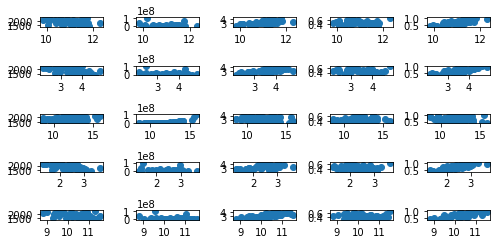

In [11]:
#5
gdpmeasures = [ 'ypc', 'ypw', 'yphw', 'yphc', 'yphhc']
x = gdpmeasures
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

ax = plt.subplot()

plt.subplot(5,5,1)
plt.scatter(np.log(ypw), dfc.avh)

plt.subplot(5,5,2)
plt.scatter(np.log(ypw), dfc.cn)

plt.subplot(5,5,3)
plt.scatter(np.log(ypw), dfc.hc)

plt.subplot(5,5,4)
plt.scatter(np.log(ypw), 1-dfc['labsh'])

plt.subplot(5,5,5)
plt.scatter(np.log(ypw), dfc.ctfp)

plt.subplot(5,5,6)
plt.scatter(np.log(yphw), dfc.avh)

plt.subplot(5,5,7)
plt.scatter(np.log(yphw), dfc.cn)

plt.subplot(5,5,8)
plt.scatter(np.log(yphw), dfc.hc)

plt.subplot(5,5,9)
plt.scatter(np.log(yphw), 1-dfc['labsh'])

plt.subplot(5,5,10)
plt.scatter(np.log(yphw), dfc.ctfp)

plt.subplot(5,5,11)
plt.scatter(np.log(yphc), dfc.avh)

plt.subplot(5,5,12)
plt.scatter(np.log(yphc), dfc.cn)

plt.subplot(5,5,13)
plt.scatter(np.log(yphc), dfc.hc)

plt.subplot(5,5,14)
plt.scatter(np.log(yphc), 1-dfc['labsh'])

plt.subplot(5,5,15)
plt.scatter(np.log(yphc), dfc.ctfp)

plt.subplot(5,5,16)
plt.scatter(np.log(yphhc), dfc.avh)

plt.subplot(5,5,17)
plt.scatter(np.log(yphhc), dfc.cn)

plt.subplot(5,5,18)
plt.scatter(np.log(yphhc), dfc.hc)

plt.subplot(5,5,19)
plt.scatter(np.log(yphhc), 1-dfc['labsh'])

plt.subplot(5,5,20)
plt.scatter(np.log(yphhc), dfc.ctfp)

plt.subplot(5,5,21)
plt.scatter(np.log(ypc), dfc.avh)

plt.subplot(5,5,22)
plt.scatter(np.log(ypc), dfc.cn)

plt.subplot(5,5,23)
plt.scatter(np.log(ypc), dfc.hc)

plt.subplot(5,5,24)
plt.scatter(np.log(ypc), 1-dfc['labsh'])

plt.subplot(5,5,25)
plt.scatter(np.log(ypc), dfc.ctfp)

for i, txt in enumerate(dfc.countrycode):
    ax.annotate(txt, (calc_table.ypc.iat[i]+0.05, dfc..iat[i]))

plt.show()


In [5]:
#measures of success